In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [145]:
df=pd.read_csv('OppData.csv',parse_dates=True,index_col='ACTIVITYDATE')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 410 entries, 2018-09-20 to 2018-10-30
Data columns (total 30 columns):
ID                                             410 non-null object
NAME                                           410 non-null object
CREATEDDATE                                    410 non-null object
EXPECTEDCLOSUREDATE                            410 non-null object
OPPORTUNITYSTATUS                              410 non-null object
HASCOMPETITORS                                 410 non-null bool
EXPECTEDTOTAL                                  410 non-null object
PROBABILITY                                    410 non-null int64
LEADCREATEDDATE                                410 non-null object
NAME.1                                         410 non-null object
COMPANY                                        410 non-null object
EMAIL                                          410 non-null object
LEADSOURCE                                     410 non-null object
STATUS  

In [147]:
df.head(3)

,ID,NAME,CREATEDDATE,EXPECTEDCLOSUREDATE,OPPORTUNITYSTATUS,HASCOMPETITORS,EXPECTEDTOTAL,PROBABILITY,LEADCREATEDDATE,NAME.1,...,POSTALCODE,COUNTRY,LEAD_ASSIGNMENT_DATE,LEAD_CLOSED_DATE,LEAD_CATEGORY,FIRST_CALL_ATTEMPT,NO_OF_ATTEMPTS,EMAIL_INTERACTION_POST_OPPORTUNITY_CREATION,CALL_INTERACTION_POST_OPPORTUNITY_CREATION,MEETING_POST_OPPORTUNITY_CREATION
ACTIVITYDATE,,,,,,,,,,,,,,,,,,,,,
2018-09-20,00A1,ABC Comissions,9/20/2018,10/27/2018,1 - Prospect,True,"2,000",20,9/11/2018,Kevin T,...,63108,UNITED STATES,9/12/2018,9/20/2018,BANT,9/11/2018,2,0,0,1
2018-09-21,00A1,ABC Comissions,9/20/2018,10/27/2018,1 - Prospect,True,"2,000",20,9/11/2018,Kevin T,...,63108,UNITED STATES,9/12/2018,9/20/2018,BANT,9/11/2018,2,1,1,0
2018-09-22,00A1,ABC Comissions,9/20/2018,10/27/2018,1 - Prospect,True,"2,000",20,9/11/2018,Kevin T,...,63108,UNITED STATES,9/12/2018,9/20/2018,BANT,9/11/2018,2,0,0,0


In [148]:
df['CREATEDDATE']=pd.to_datetime(df['CREATEDDATE'])
df['LEADCREATEDDATE']=pd.to_datetime(df['LEADCREATEDDATE'])
df['EXPECTEDCLOSUREDATE']=pd.to_datetime(df['EXPECTEDCLOSUREDATE'])
df['LEAD_ASSIGNMENT_DATE']=pd.to_datetime(df['LEAD_ASSIGNMENT_DATE'])
df['LEAD_CLOSED_DATE']=pd.to_datetime(df['LEAD_CLOSED_DATE'])
df['FIRST_CALL_ATTEMPT']=pd.to_datetime(df['FIRST_CALL_ATTEMPT'])

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 410 entries, 2018-09-20 to 2018-10-30
Data columns (total 30 columns):
ID                                             410 non-null object
NAME                                           410 non-null object
CREATEDDATE                                    410 non-null datetime64[ns]
EXPECTEDCLOSUREDATE                            410 non-null datetime64[ns]
OPPORTUNITYSTATUS                              410 non-null object
HASCOMPETITORS                                 410 non-null bool
EXPECTEDTOTAL                                  410 non-null object
PROBABILITY                                    410 non-null int64
LEADCREATEDDATE                                410 non-null datetime64[ns]
NAME.1                                         410 non-null object
COMPANY                                        410 non-null object
EMAIL                                          410 non-null object
LEADSOURCE                                     410 

In [150]:
df['LEAD_AGE_DAYS']=(df['CREATEDDATE']-df['LEADCREATEDDATE']).dt.days
df['LEAD_ASSIGMENT_AGE']=(df['CREATEDDATE']-df['LEAD_ASSIGNMENT_DATE']).dt.days
df['DAYS_TAKEN_TO_CLOSE_LEAD']=(df['LEAD_CLOSED_DATE']-df['LEAD_ASSIGNMENT_DATE']).dt.days
df['ISCLOSED']=df['OPPORTUNITYSTATUS'].str.contains('5 - Closed Won') | df['OPPORTUNITYSTATUS'].str.contains('5 - Closed Lost')

In [151]:
df.loc['2018-10-01','ISCLOSED']

ACTIVITYDATE
2018-10-01    False
2018-10-01    False
2018-10-01    False
2018-10-01    False
2018-10-01    False
2018-10-01    False
2018-10-01    False
2018-10-01    False
2018-10-01    False
2018-10-01    False
2018-10-01    False
Name: ISCLOSED, dtype: bool

In [152]:
df.loc['2018-10-08','ISCLOSED']

ACTIVITYDATE
2018-10-08    False
2018-10-08    False
2018-10-08     True
2018-10-08    False
2018-10-08    False
2018-10-08    False
2018-10-08    False
2018-10-08    False
2018-10-08    False
2018-10-08    False
2018-10-08    False
Name: ISCLOSED, dtype: bool

In [153]:
df['OVERDUE']= (df['EXPECTEDCLOSUREDATE'] < df.index ) & ~(df['OPPORTUNITYSTATUS'].str.contains('5 - Closed Won') | df['OPPORTUNITYSTATUS'].str.contains('5 - Closed Lost'))

In [154]:
df['ELAPSED_TIME']=( df.index - df['CREATEDDATE']).dt.days

In [155]:
df.loc['2018-10-01','ELAPSED_TIME']

ACTIVITYDATE
2018-10-01    11
2018-10-01    11
2018-10-01     0
2018-10-01    11
2018-10-01     7
2018-10-01     6
2018-10-01     6
2018-10-01     4
2018-10-01     0
2018-10-01    11
2018-10-01    11
Name: ELAPSED_TIME, dtype: int64

In [156]:
df['EMAIL_INTERACTION_POST_OPPORTUNITY_CREATION_CUMM']=df.groupby('ID')['EMAIL_INTERACTION_POST_OPPORTUNITY_CREATION'].cumsum()

In [157]:
df.loc[:,'EMAIL_INTERACTION_POST_OPPORTUNITY_CREATION_CUMM'].tail(10)

ACTIVITYDATE
2018-10-21     9
2018-10-22     9
2018-10-23    10
2018-10-24    10
2018-10-25    10
2018-10-26    10
2018-10-27    10
2018-10-28    12
2018-10-29    12
2018-10-30    13
Name: EMAIL_INTERACTION_POST_OPPORTUNITY_CREATION_CUMM, dtype: int64

In [158]:
df['CALL_INTERACTION_POST_OPPORTUNITY_CREATION_CUMM']=df.groupby('ID')['CALL_INTERACTION_POST_OPPORTUNITY_CREATION'].cumsum()

In [159]:
df.loc[:,'CALL_INTERACTION_POST_OPPORTUNITY_CREATION_CUMM'].tail(10)

ACTIVITYDATE
2018-10-21    5
2018-10-22    5
2018-10-23    6
2018-10-24    6
2018-10-25    6
2018-10-26    6
2018-10-27    6
2018-10-28    7
2018-10-29    7
2018-10-30    7
Name: CALL_INTERACTION_POST_OPPORTUNITY_CREATION_CUMM, dtype: int64

In [160]:
df['MEETING_POST_OPPORTUNITY_CREATION_CUMM']=df.groupby('ID')['MEETING_POST_OPPORTUNITY_CREATION'].cumsum()

In [161]:
df.loc[:,'MEETING_POST_OPPORTUNITY_CREATION_CUMM'].tail(10)

ACTIVITYDATE
2018-10-21     9
2018-10-22     9
2018-10-23     9
2018-10-24    10
2018-10-25    10
2018-10-26    10
2018-10-27    10
2018-10-28    10
2018-10-29    11
2018-10-30    11
Name: MEETING_POST_OPPORTUNITY_CREATION_CUMM, dtype: int64

In [162]:
df['POST_OPPORTUNITY_INERACTION_CUMM']=df['EMAIL_INTERACTION_POST_OPPORTUNITY_CREATION_CUMM']+df['CALL_INTERACTION_POST_OPPORTUNITY_CREATION_CUMM']+df['MEETING_POST_OPPORTUNITY_CREATION_CUMM']

In [163]:
df.loc[:,'POST_OPPORTUNITY_INERACTION_CUMM'].tail(10)

ACTIVITYDATE
2018-10-21    23
2018-10-22    23
2018-10-23    25
2018-10-24    26
2018-10-25    26
2018-10-26    26
2018-10-27    26
2018-10-28    29
2018-10-29    30
2018-10-30    31
Name: POST_OPPORTUNITY_INERACTION_CUMM, dtype: int64

In [164]:
df['PRE_OPPORTUNITY_INTERACTION_CUMM']= df['NO_OF_ATTEMPTS']

In [165]:
df.loc[:,'PRE_OPPORTUNITY_INTERACTION_CUMM'].tail(10)

ACTIVITYDATE
2018-10-21    0
2018-10-22    0
2018-10-23    0
2018-10-24    0
2018-10-25    0
2018-10-26    0
2018-10-27    0
2018-10-28    0
2018-10-29    0
2018-10-30    0
Name: PRE_OPPORTUNITY_INTERACTION_CUMM, dtype: int64

In [166]:
df['TOTAL_INTERACTION_TILLDATE_CUMM']=df['PRE_OPPORTUNITY_INTERACTION_CUMM']+df['POST_OPPORTUNITY_INERACTION_CUMM']

In [167]:
df['TOTAL_INTERACTION_POST_OPPORTUNITY_DAY']=df['EMAIL_INTERACTION_POST_OPPORTUNITY_CREATION']+df['CALL_INTERACTION_POST_OPPORTUNITY_CREATION']+ df['MEETING_POST_OPPORTUNITY_CREATION']

In [168]:
df.loc[df.ID=='00A9',['TOTAL_INTERACTION_TILLDATE_CUMM', 'TOTAL_INTERACTION_POST_OPPORTUNITY_DAY']]

,TOTAL_INTERACTION_TILLDATE_CUMM,TOTAL_INTERACTION_POST_OPPORTUNITY_DAY
ACTIVITYDATE,,
2018-10-01,2,1
2018-10-02,2,0
2018-10-03,3,1
2018-10-04,3,0
2018-10-05,4,1
2018-10-06,4,0
2018-10-07,4,0
2018-10-08,6,2


In [169]:
df['SYSDATE']=df.index

In [170]:
df.loc[df.ID=='00A9','SYSDATE'].tail(5)

ACTIVITYDATE
2018-10-04   2018-10-04
2018-10-05   2018-10-05
2018-10-06   2018-10-06
2018-10-07   2018-10-07
2018-10-08   2018-10-08
Name: SYSDATE, dtype: datetime64[ns]

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 410 entries, 2018-09-20 to 2018-10-30
Data columns (total 44 columns):
ID                                                  410 non-null object
NAME                                                410 non-null object
CREATEDDATE                                         410 non-null datetime64[ns]
EXPECTEDCLOSUREDATE                                 410 non-null datetime64[ns]
OPPORTUNITYSTATUS                                   410 non-null object
HASCOMPETITORS                                      410 non-null bool
EXPECTEDTOTAL                                       410 non-null object
PROBABILITY                                         410 non-null int64
LEADCREATEDDATE                                     410 non-null datetime64[ns]
NAME.1                                              410 non-null object
COMPANY                                             410 non-null object
EMAIL                                               410 non-nul

In [172]:
df.drop(columns=['SYSDATE'])

,ID,NAME,CREATEDDATE,EXPECTEDCLOSUREDATE,OPPORTUNITYSTATUS,HASCOMPETITORS,EXPECTEDTOTAL,PROBABILITY,LEADCREATEDDATE,NAME.1,...,ISCLOSED,OVERDUE,ELAPSED_TIME,EMAIL_INTERACTION_POST_OPPORTUNITY_CREATION_CUMM,CALL_INTERACTION_POST_OPPORTUNITY_CREATION_CUMM,MEETING_POST_OPPORTUNITY_CREATION_CUMM,POST_OPPORTUNITY_INERACTION_CUMM,PRE_OPPORTUNITY_INTERACTION_CUMM,TOTAL_INTERACTION_TILLDATE_CUMM,TOTAL_INTERACTION_POST_OPPORTUNITY_DAY
ACTIVITYDATE,,,,,,,,,,,,,,,,,,,,,
2018-09-20,00A1,ABC Comissions,2018-09-20,2018-10-27,1 - Prospect,True,"2,000",20,2018-09-11,Kevin T,...,False,False,0,0,0,1,1,2,3,1
2018-09-21,00A1,ABC Comissions,2018-09-20,2018-10-27,1 - Prospect,True,"2,000",20,2018-09-11,Kevin T,...,False,False,1,1,1,1,3,2,5,2
2018-09-22,00A1,ABC Comissions,2018-09-20,2018-10-27,1 - Prospect,True,"2,000",20,2018-09-11,Kevin T,...,False,False,2,1,1,1,3,2,5,0
2018-09-23,00A1,ABC Comissions,2018-09-20,2018-10-27,1 - Prospect,True,"2,000",20,2018-09-11,Kevin T,...,False,False,3,1,1,1,3,2,5,0
2018-09-24,00A1,ABC Comissions,2018-09-20,2018-10-27,1 - Prospect,True,"2,000",20,2018-09-11,Kevin T,...,False,False,4,2,1,2,5,2,7,2
2018-09-25,00A1,ABC Comissions,2018-09-20,2018-10-27,1 - Prospect,True,"2,000",20,2018-09-11,Kevin T,...,False,False,5,2,1,2,5,2,7,0
2018-09-26,00A1,ABC Comissions,2018-09-20,2018-10-27,1 - Prospect,True,"2,000",20,2018-09-11,Kevin T,...,False,False,6,2,1,2,5,2,7,0
2018-09-27,00A1,ABC Comissions,2018-09-20,2018-10-27,1 - Prospect,True,"2,000",20,2018-09-11,Kevin T,...,False,False,7,2,1,2,5,2,7,0
2018-09-28,00A1,ABC Comissions,2018-09-20,2018-10-27,1 - Prospect,True,"2,000",20,2018-09-11,Kevin T,...,False,False,8,2,1,2,5,2,7,0


In [173]:
df['TOTAL_INTERACTION_POST_OPPORTUNITY_10days'] = df['TOTAL_INTERACTION_POST_OPPORTUNITY_DAY'].rolling(min_periods=1, window=10).sum().astype('int64')

In [174]:
df.loc[:,['ID','TOTAL_INTERACTION_POST_OPPORTUNITY_DAY','TOTAL_INTERACTION_TILLDATE_CUMM','TOTAL_INTERACTION_POST_OPPORTUNITY_10days']].head(21)

,ID,TOTAL_INTERACTION_POST_OPPORTUNITY_DAY,TOTAL_INTERACTION_TILLDATE_CUMM,TOTAL_INTERACTION_POST_OPPORTUNITY_10days
ACTIVITYDATE,,,,
2018-09-20,00A1,1,3,1
2018-09-21,00A1,2,5,3
2018-09-22,00A1,0,5,3
2018-09-23,00A1,0,5,3
2018-09-24,00A1,2,7,5
2018-09-25,00A1,0,7,5
2018-09-26,00A1,0,7,5
2018-09-27,00A1,0,7,5
2018-09-28,00A1,0,7,5


In [175]:
df['DAY_OF_WEEK']=df.index.day_name()

In [176]:
df.loc[:,['ID','DAY_OF_WEEK']].head()

,ID,DAY_OF_WEEK
ACTIVITYDATE,,
2018-09-20,00A1,Thursday
2018-09-21,00A1,Friday
2018-09-22,00A1,Saturday
2018-09-23,00A1,Sunday
2018-09-24,00A1,Monday


In [177]:
df['TOTAL_INTERACTION_POST_OPPORTUNITY_WTD'] = df.groupby(df.DAY_OF_WEEK.eq('Saturday').cumsum()).TOTAL_INTERACTION_POST_OPPORTUNITY_DAY.cumsum()

In [178]:
df['TOTAL_INTERACTION_POST_OPPORTUNITY_10DAY'] = df['TOTAL_INTERACTION_POST_OPPORTUNITY_DAY'].rolling(min_periods=1, window=10).sum().astype('int64')

In [179]:
df.loc[:,['ID','DAY_OF_WEEK','TOTAL_INTERACTION_POST_OPPORTUNITY_DAY','TOTAL_INTERACTION_POST_OPPORTUNITY_WTD','TOTAL_INTERACTION_POST_OPPORTUNITY_10DAY' ]].head(21)

,ID,DAY_OF_WEEK,TOTAL_INTERACTION_POST_OPPORTUNITY_DAY,TOTAL_INTERACTION_POST_OPPORTUNITY_WTD,TOTAL_INTERACTION_POST_OPPORTUNITY_10DAY
ACTIVITYDATE,,,,,
2018-09-20,00A1,Thursday,1,1,1
2018-09-21,00A1,Friday,2,3,3
2018-09-22,00A1,Saturday,0,0,3
2018-09-23,00A1,Sunday,0,0,3
2018-09-24,00A1,Monday,2,2,5
2018-09-25,00A1,Tuesday,0,2,5
2018-09-26,00A1,Wednesday,0,2,5
2018-09-27,00A1,Thursday,0,2,5
2018-09-28,00A1,Friday,0,2,5


In [180]:
df_plot_data = df.groupby(['ID']).tail(1)
df_plot_stage_state = df_plot_data.groupby(['OPPORTUNITYSTATUS', 'STATE']).size().unstack('OPPORTUNITYSTATUS')
df_plot_state = df_plot_data.groupby(['STATE']).size()

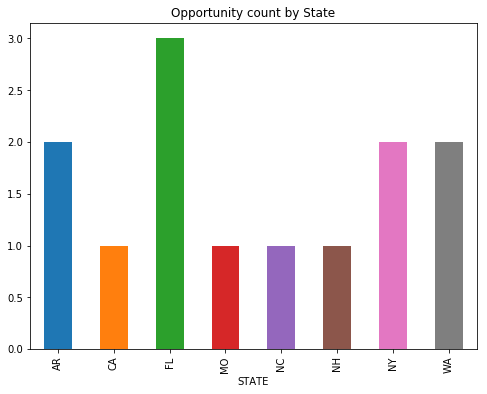

In [181]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
df_plot_state.plot(kind='bar', title = 'Opportunity count by State')

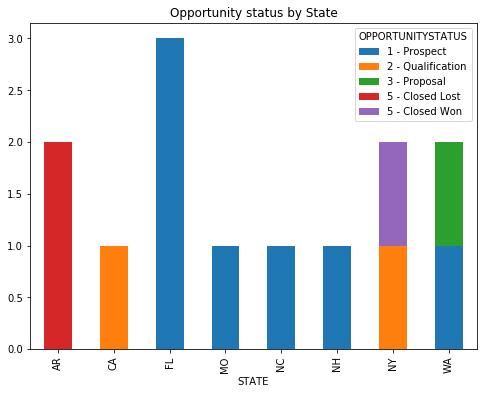

In [182]:
df_plot_stage_state.plot(kind='bar', title = 'Opportunity status by State',stacked=True)

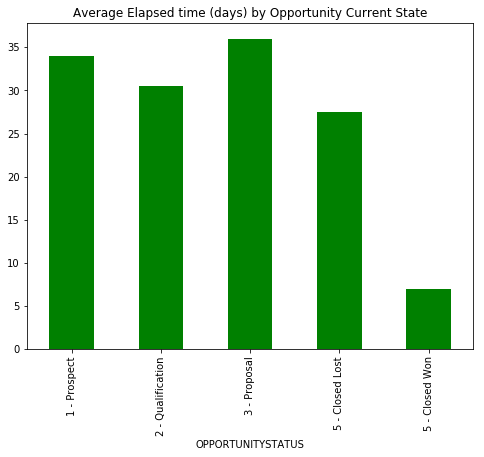

In [183]:
df_plot_elapsedtime_status = df_plot_data.groupby(['OPPORTUNITYSTATUS'])['ELAPSED_TIME'].mean()
df_plot_elapsedtime_status.plot(kind='bar',color='green', title = 'Average Elapsed time (days) by Opportunity Current State')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 410 entries, 2018-09-20 to 2018-10-30
Data columns (total 48 columns):
ID                                                  410 non-null object
NAME                                                410 non-null object
CREATEDDATE                                         410 non-null datetime64[ns]
EXPECTEDCLOSUREDATE                                 410 non-null datetime64[ns]
OPPORTUNITYSTATUS                                   410 non-null object
HASCOMPETITORS                                      410 non-null bool
EXPECTEDTOTAL                                       410 non-null object
PROBABILITY                                         410 non-null int64
LEADCREATEDDATE                                     410 non-null datetime64[ns]
NAME.1                                              410 non-null object
COMPANY                                             410 non-null object
EMAIL                                               410 non-nul

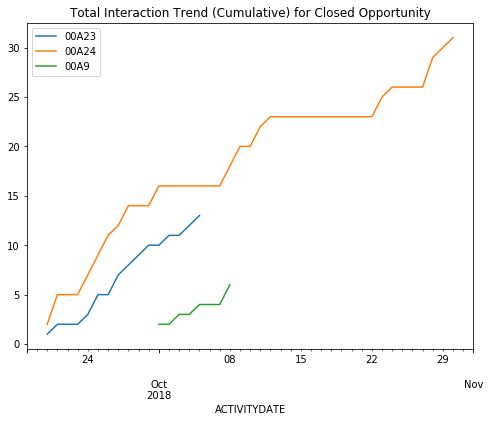

In [185]:
df_plot_line = df.reset_index()
closed_list= df_plot_line[df_plot_line['OPPORTUNITYSTATUS'].str.contains('Closed')].ID.tolist()
fig, ax = plt.subplots()
for key, grp in df_plot_line.loc[df_plot_line['ID'].isin(closed_list)].groupby(['ID']):
    ax = grp.plot(ax=ax, kind='line', x='ACTIVITYDATE', y='TOTAL_INTERACTION_TILLDATE_CUMM', title = 'Total Interaction Trend (Cumulative) for Closed Opportunity',label=key)
plt.show()

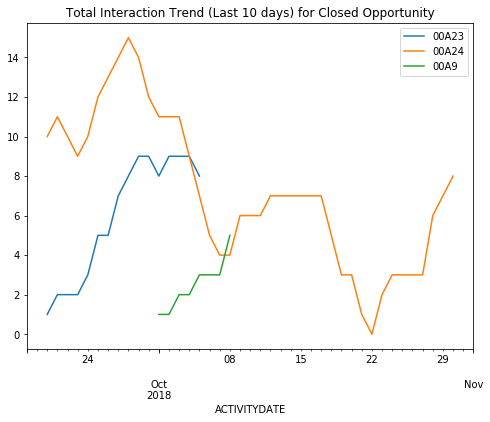

In [186]:
fig, ax = plt.subplots()
for key, grp in df_plot_line.loc[df_plot_line['ID'].isin(closed_list)].groupby(['ID']):
    ax = grp.plot(ax=ax, kind='line', x='ACTIVITYDATE', y='TOTAL_INTERACTION_POST_OPPORTUNITY_10DAY', title = 'Total Interaction Trend (Last 10 days) for Closed Opportunity',label=key)
plt.show()

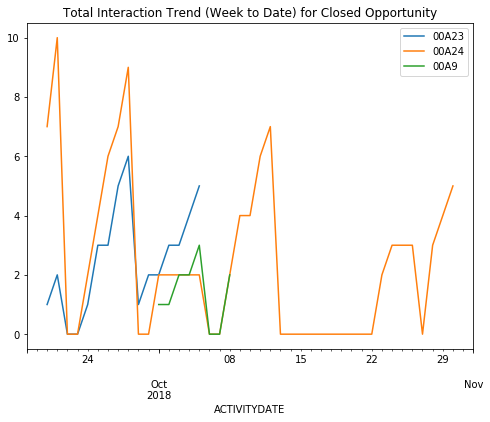

In [187]:
fig, ax = plt.subplots()
for key, grp in df_plot_line.loc[df_plot_line['ID'].isin(closed_list)].groupby(['ID']):
    ax = grp.plot(ax=ax, kind='line', x='ACTIVITYDATE', y='TOTAL_INTERACTION_POST_OPPORTUNITY_WTD', title = 'Total Interaction Trend (Week to Date) for Closed Opportunity',label=key)
plt.show()